## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('comm_data_clean.csv')
df

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type,Event.Day,Event.Month,Event.Year
0,IL,United States,Unknown,Lockheed,L-1011,3.0,Turbo Fan,Unknown,0.0,0.0,...,Unknown,149.0,0.0,0.000000,100.000000,0.000000,Commercial,12,1,1982
1,DC,United States,Destroyed,Boeing,737-222,2.0,Turbo Fan,Unknown,78.0,6.0,...,Instrumental Meteorological Conditions,87.0,87.0,100.000000,0.000000,89.655172,Commercial,13,1,1982
2,MA,United States,Destroyed,Mcdonnel Douglas,Dc-10-30,3.0,Turbo Fan,Unknown,2.0,4.0,...,Instrumental Meteorological Conditions,212.0,30.0,14.150943,85.849057,0.943396,Commercial,23,1,1982
3,PA,United States,Minor,Mcdonnel Douglas,Dc-10-10,3.0,Turbo Fan,Unknown,0.0,1.0,...,Instrumental Meteorological Conditions,155.0,1.0,0.645161,99.354839,0.000000,Commercial,3,2,1982
4,CA,United States,Minor,Boeing,B737-2H4,2.0,Turbo Jet,Unknown,0.0,0.0,...,Instrumental Meteorological Conditions,119.0,0.0,0.000000,100.000000,0.000000,Commercial,15,2,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,OH,United States,Unknown,Boeing,737-824,2.0,Unknown,Unknown,0.0,0.0,...,Visual Meteorological Conditions,170.0,1.0,0.588235,99.411765,0.000000,Commercial,19,8,2022
1704,MI,United States,Unknown,Boeing,717-200,2.0,Unknown,Unknown,0.0,0.0,...,Visual Meteorological Conditions,102.0,1.0,0.980392,99.019608,0.000000,Commercial,29,8,2022
1705,CA,United States,Unknown,Airbus,A330-243,2.0,Unknown,Unknown,0.0,0.0,...,Unknown,290.0,0.0,0.000000,100.000000,0.000000,Commercial,22,9,2022
1706,OF,Foreign Country,Unknown,Boeing,737,2.0,Unknown,Unknown,0.0,1.0,...,Unknown,106.0,1.0,0.943396,99.056604,0.000000,Commercial,3,10,2022


## Visualize KPIs

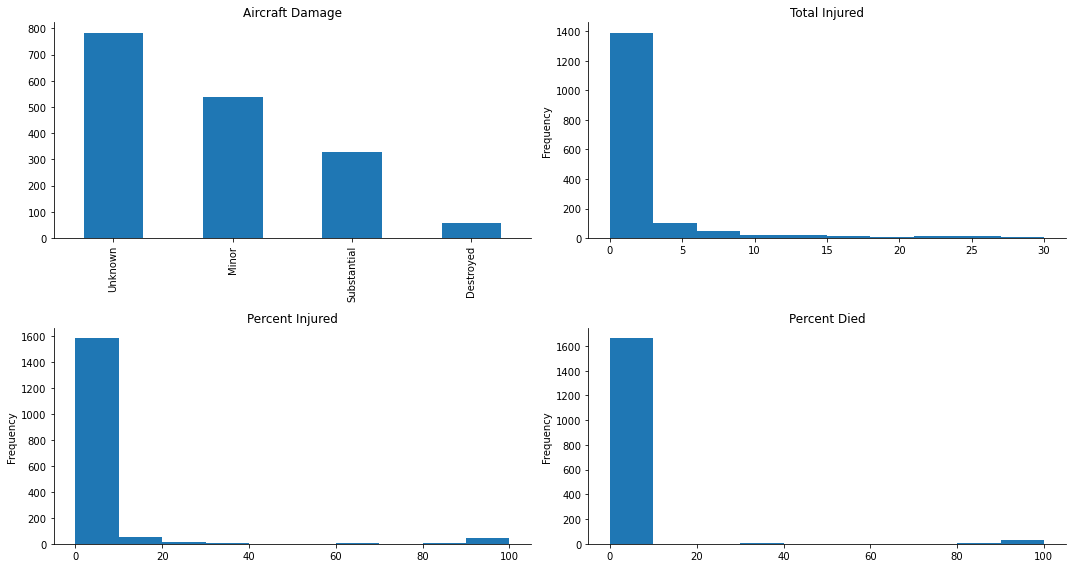

In [18]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [21]:
df['Make'].value_counts()

Boeing              990
Mcdonnel Douglas    342
Airbus              206
Bombardier           51
Embraer              44
Lockheed             36
Cessna               11
Aerospatiale          9
Beech                 4
Piper                 4
Fairchild             3
De Havilland          3
Grumman               1
Learjet               1
Mooney                1
Aero Commander        1
Hughes                1
Name: Make, dtype: int64

In [22]:
popular_makes = df['Make'].value_counts()
popular_makes = list(popular_makes[popular_makes > 50].index)

print(f"top makes: {popular_makes}")

top makes: ['Boeing', 'Mcdonnel Douglas', 'Airbus', 'Bombardier']


## Damage Index

In [23]:
pop_means_df = df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = df[df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [24]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,0.798990,990.0,95.875352,4.124648,2.073749,1.005025,0.803005
Airbus,0.737864,206.0,94.739431,5.260569,3.355007,1.789940,1.320732
Mcdonnel Douglas,0.938596,342.0,94.988345,5.011655,2.177668,1.536472,1.442127
Bombardier,0.960784,51.0,97.002722,2.997278,1.921569,2.487965,2.390398


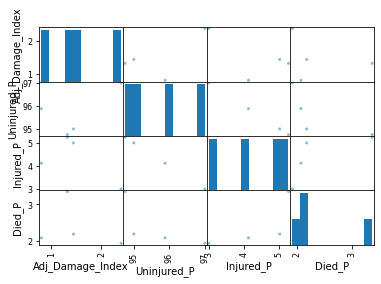

In [25]:
pd.plotting.scatter_matrix(di_df[['Adj_Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

In [26]:
di_df = di_df.sort_values(by = 'Adj_Damage_Index')[:5]
di_df

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,0.798990,990.0,95.875352,4.124648,2.073749,1.005025,0.803005
Airbus,0.737864,206.0,94.739431,5.260569,3.355007,1.789940,1.320732
Mcdonnel Douglas,0.938596,342.0,94.988345,5.011655,2.177668,1.536472,1.442127
Bombardier,0.960784,51.0,97.002722,2.997278,1.921569,2.487965,2.390398


In [29]:
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Make'].isin(di_df.index)& (df['Total.Passengers'] != 0))]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Make'].isin(di_df.index)) & (df['Percent.Died'] == 0)& (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Make'].isin(di_df.index)) & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]

In [30]:
model_performance =  ((best_dest['Model'].value_counts() + best_subs['Model'].value_counts() + best_minor['Model'].value_counts())/df['Model'].value_counts()).dropna().sort_values()

In [31]:
model_vc = df['Model'].value_counts()

In [32]:
model_pwdc = pd.concat({'Performance':model_performance, 'Amount of incidents':model_vc}, axis=1).dropna()
model_pwdc.sort_values(by='Amount of incidents',ascending=False)

,Performance,Amount of incidents
737,0.547945,73
Dc-10-10,0.166667,36
Dc-9-82,0.382353,34
737-300,0.312500,32
737-200,0.280000,25
Dc-9-32,0.521739,23
Dc-9-31,0.285714,21
Md-82,0.300000,20
Dc-10-30,0.263158,19
727-232,0.437500,16


<AxesSubplot:ylabel='Frequency'>

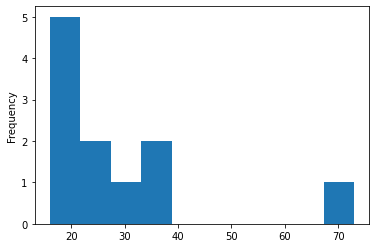

In [36]:
model_pwdc['Amount of incidents'].plot(kind='hist')

In [35]:
model_pwdc = model_pwdc.loc[model_pwdc['Amount of incidents'] >= 15]

In [37]:
model_pwdc.sort_values(by='Performance',ascending=False)

,Performance,Amount of incidents
737,0.547945,73
Dc-9-32,0.521739,23
727-232,0.437500,16
A320,0.437500,16
Dc-9-82,0.382353,34
737-300,0.312500,32
Md-82,0.300000,20
Dc-9-31,0.285714,21
737-200,0.280000,25
Dc-10-30,0.263158,19


In [38]:
joint = df.join(model_pwdc, how='outer',on='Model').dropna()
joint

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type,Event.Day,Event.Month,Event.Year,Performance,Amount of incidents
2,MA,United States,Destroyed,Mcdonnel Douglas,Dc-10-30,3.0,Turbo Fan,Unknown,2.0,4.0,...,30.0,14.150943,85.849057,0.943396,Commercial,23,1,1982,0.263158,19.0
32,CA,United States,Unknown,Mcdonnel Douglas,Dc-10-30,3.0,Turbo Fan,Unknown,0.0,0.0,...,14.0,6.451613,93.548387,0.000000,Commercial,30,12,1982,0.263158,19.0
71,FL,United States,Minor,Mcdonnel Douglas,Dc-10-30,3.0,Turbo Fan,Unknown,0.0,0.0,...,0.0,0.000000,100.000000,0.000000,Commercial,1,9,1983,0.263158,19.0
95,Unknown/Foreign Location,Foreign Country,Unknown,Mcdonnel Douglas,Dc-10-30,3.0,Turbo Fan,Unknown,0.0,0.0,...,1.0,0.201613,99.798387,0.000000,Commercial,1,1,1984,0.263158,19.0
100,NY,United States,Substantial,Mcdonnel Douglas,Dc-10-30,3.0,Turbo Fan,Unknown,0.0,1.0,...,12.0,6.779661,93.220339,0.000000,Commercial,28,2,1984,0.263158,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,Unknown/Foreign Location,Foreign Country,Unknown,Airbus,A320,2.0,Turbo Fan,Unknown,0.0,0.0,...,0.0,0.000000,100.000000,0.000000,Commercial,8,2,2017,0.437500,16.0
1633,NV,United States,Unknown,Airbus,A320,2.0,Unknown,Unknown,0.0,0.0,...,1.0,0.613497,99.386503,0.000000,Commercial,2,12,2018,0.437500,16.0
1651,VA,United States,Unknown,Airbus,A320,2.0,Unknown,Unknown,0.0,0.0,...,1.0,0.645161,99.354839,0.000000,Commercial,8,8,2019,0.437500,16.0
1661,LA,United States,Unknown,Airbus,A320,2.0,Turbo Fan,Unknown,0.0,0.0,...,1.0,0.628931,99.371069,0.000000,Commercial,10,1,2020,0.437500,16.0


In [39]:
joint.to_csv('comm_analyzed.csv')